In [23]:
from PattRecClasses import DiscreteD, GaussD, HMM, MarkovChain, GetPx
from matplotlib import pyplot as plt
import numpy as np

from matplotlib import pyplot as plt
from scipy.io import wavfile
from scipy.signal import firwin,filtfilt
from GetMusicFeatures import GetMusicFeatures
from FeatureExtractor import FeatureExtractor
import numpy as np
import pickle as pkl
def lowpass(x,fc,fs=44100):
    """ x is the signal, 
        fc is the cuttoff frequency expressed in Hz, must be between [0,fs/2]
    """
    b = firwin(1024, fc,fs=fs)
    y = filtfilt(b,1,x)
    return y

In [24]:
blues_all_feature_data = np.load('blues_all_feature_data.npy')

In [25]:
blues_all_feature_data[0]

array([[-39.2364277 , -39.42877245, -39.08945066, ..., -39.82572513,
        -39.95574229, -39.75880158]])

In [26]:
classical_all_feature_data = np.load('classical_all_feature_data.npy',allow_pickle=True)
for ff in range(len(classical_all_feature_data)):
    classical_all_feature_data[ff] = np.expand_dims(classical_all_feature_data[ff],axis=0)

In [27]:
classical_all_feature_data[0]

array([[-39.72151879, -39.35412426, -39.9880332 , ..., -39.4885765 ,
        -39.62322488, -39.47311766]])

In [28]:
reggae_all_feature_data = np.load('reggae_all_feature_data.npy',allow_pickle=True)
for ff in range(len(reggae_all_feature_data)):
    reggae_all_feature_data[ff] = np.expand_dims(reggae_all_feature_data[ff],axis=0)

In [29]:
reggae_all_feature_data[0]

array([[-39.87994897,  -7.59050708,   4.27981186, ..., -39.52099543,
        -16.99756332, -39.45570147]])

In [30]:
disco_all_feature_data = np.load('disco_all_feature_data.npy',allow_pickle=True)
for ff in range(len(disco_all_feature_data)):
    disco_all_feature_data[ff] = np.expand_dims(disco_all_feature_data[ff],axis=0)

In [31]:
disco_all_feature_data[0]

array([[-39.28319845,  -8.87301442,  -8.87301442, ..., -39.5732199 ,
         -2.4809985 , -39.06421209]])

In [32]:
country_all_feature_data = np.load('country_all_feature_data.npy',allow_pickle=True)
for ff in range(len(country_all_feature_data)):
    country_all_feature_data[ff] = np.expand_dims(country_all_feature_data[ff],axis=0)

In [33]:
country_all_feature_data[0]

array([[-39.30503411,  26.49700549,  26.49700549, ..., -39.44112637,
        -39.71941897, -39.27679908]])

In [34]:
country_all_feature_data = np.load('country_all_feature_data.npy',allow_pickle=True)
for ff in range(len(country_all_feature_data)):
    country_all_feature_data[ff] = np.expand_dims(country_all_feature_data[ff],axis=0)

In [35]:
data_list = [blues_all_feature_data, 
            classical_all_feature_data, 
            disco_all_feature_data,
            reggae_all_feature_data]

In [13]:
# state_number = 4


q = np.array([0.25,0.25,0.25,0.25])
A = np.array([[0.25,0.25,0.25,0.25],[0.25,0.25,0.25,0.25],[0.25,0.25,0.25,0.25],[0.25,0.25,0.25,0.25]])
mc = MarkovChain(q,A)

g1 = GaussD( means=[0], stdevs=[1] )   # Distribution for state = 1
g2 = GaussD( means=[10], stdevs=[2] )  # Distribution for state = 2
g3 = GaussD( means=[4], stdevs=[10])   # Distribution for state = 3
g4 = GaussD( means=[0], stdevs=[1])   # Distribution for state = 4

blues_h  = HMM( mc, [g1, g2, g3, g4]) 

q2 = np.array([0.25,0.25,0.25,0.25])
A2 = np.array([[0.25,0.25,0.25,0.25],[0.25,0.25,0.25,0.25],[0.25,0.25,0.25,0.25],[0.25,0.25,0.25,0.25]])
mc2 = MarkovChain(q2,A2)

g12 = GaussD( means=[0], stdevs=[1] )   # Distribution for state = 1
g22 = GaussD( means=[10], stdevs=[2] )  # Distribution for state = 2
g32 = GaussD( means=[4], stdevs=[10])   # Distribution for state = 3
g42 = GaussD( means=[0], stdevs=[1])   # Distribution for state = 4

classical_h = HMM( mc2, [g12, g22, g32, g42]) 

q3 = np.array([0.25,0.25,0.25,0.25])
A3 = np.array([[0.25,0.25,0.25,0.25],[0.25,0.25,0.25,0.25],[0.25,0.25,0.25,0.25],[0.25,0.25,0.25,0.25]])
mc3 = MarkovChain(q3,A3)

g13 = GaussD( means=[0], stdevs=[1] )   # Distribution for state = 1
g23 = GaussD( means=[10], stdevs=[2] )  # Distribution for state = 2
g33 = GaussD( means=[4], stdevs=[10])   # Distribution for state = 3
g43 = GaussD( means=[0], stdevs=[1])   # Distribution for state = 4
country_h = HMM( mc3, [g13, g23, g33, g43]) 

q4 = np.array([0.25,0.25,0.25,0.25])
A4 = np.array([[0.25,0.25,0.25,0.25],[0.25,0.25,0.25,0.25],[0.25,0.25,0.25,0.25],[0.25,0.25,0.25,0.25]])
mc4 = MarkovChain(q4,A4)

g14 = GaussD( means=[0], stdevs=[1] )   # Distribution for state = 1
g24 = GaussD( means=[10], stdevs=[2] )  # Distribution for state = 2
g34 = GaussD( means=[4], stdevs=[10])   # Distribution for state = 3
g44 = GaussD( means=[0], stdevs=[1])   # Distribution for state = 4
disco_h = HMM( mc4, [g14, g24, g34, g44]) 

q5 = np.array([0.25,0.25,0.25,0.25])
A5 = np.array([[0.25,0.25,0.25,0.25],[0.25,0.25,0.25,0.25],[0.25,0.25,0.25,0.25],[0.25,0.25,0.25,0.25]])
mc5 = MarkovChain(q5,A5)

g15 = GaussD( means=[0], stdevs=[1] )   # Distribution for state = 1
g25 = GaussD( means=[10], stdevs=[2] )  # Distribution for state = 2
g35 = GaussD( means=[4], stdevs=[10])   # Distribution for state = 3
g45 = GaussD( means=[0], stdevs=[1])   # Distribution for state = 4
hiphop_h = HMM( mc5, [g15, g25, g35, g45]) 

HMM_list = [blues_h, classical_h, disco_h, hiphop_h]

In [22]:
# state_number = 8


q = np.array([0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125])
A = np.array([[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125]])
mc = MarkovChain(q,A)

g1 = GaussD( means=[0], stdevs=[1] )   # Distribution for state = 1
g2 = GaussD( means=[10], stdevs=[2] )  # Distribution for state = 2
g3 = GaussD( means=[4], stdevs=[10])   # Distribution for state = 3
g4 = GaussD( means=[0], stdevs=[1])   # Distribution for state = 4
g5 = GaussD( means=[0], stdevs=[1] )   # Distribution for state = 1
g6 = GaussD( means=[10], stdevs=[2] )  # Distribution for state = 2
g7 = GaussD( means=[4], stdevs=[10])   # Distribution for state = 3
g8 = GaussD( means=[0], stdevs=[1])   # Distribution for state = 4

blues_h  = HMM( mc, [g1, g2, g3, g4, g5, g6, g7, g8]) 

q2 = np.array([0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125])
A2 = np.array([[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125]])
mc2 = MarkovChain(q2,A2)

g12 = GaussD( means=[0], stdevs=[1] )   # Distribution for state = 1
g22 = GaussD( means=[10], stdevs=[2] )  # Distribution for state = 2
g32 = GaussD( means=[4], stdevs=[10])   # Distribution for state = 3
g42 = GaussD( means=[0], stdevs=[1])   # Distribution for state = 4
g52 = GaussD( means=[0], stdevs=[1] )   # Distribution for state = 1
g62 = GaussD( means=[10], stdevs=[2] )  # Distribution for state = 2
g72 = GaussD( means=[4], stdevs=[10])   # Distribution for state = 3
g82 = GaussD( means=[0], stdevs=[1])   # Distribution for state = 4
country_h = HMM( mc2, [g12, g22, g32, g42, g52, g62, g72, g82]) 

q3 = np.array([0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125])
A3 = np.array([[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125]])
mc3 = MarkovChain(q3,A3)

g13 = GaussD( means=[0], stdevs=[1] )   # Distribution for state = 1
g23 = GaussD( means=[10], stdevs=[2] )  # Distribution for state = 2
g33 = GaussD( means=[4], stdevs=[10])   # Distribution for state = 3
g43 = GaussD( means=[0], stdevs=[1])   # Distribution for state = 4
g53 = GaussD( means=[0], stdevs=[1] )   # Distribution for state = 1
g63 = GaussD( means=[10], stdevs=[2] )  # Distribution for state = 2
g73 = GaussD( means=[4], stdevs=[10])   # Distribution for state = 3
g83 = GaussD( means=[0], stdevs=[1])   # Distribution for state = 4
classical_h = HMM( mc3, [g13, g23, g33, g43, g53, g63, g73, g83]) 

q4 = np.array([0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125])
A4 = np.array([[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125]])
mc4 = MarkovChain(q4,A4)

g14 = GaussD( means=[0], stdevs=[1] )   # Distribution for state = 1
g24 = GaussD( means=[10], stdevs=[2] )  # Distribution for state = 2
g34 = GaussD( means=[4], stdevs=[10])   # Distribution for state = 3
g44 = GaussD( means=[0], stdevs=[1])   # Distribution for state = 4
g54 = GaussD( means=[0], stdevs=[1] )   # Distribution for state = 1
g64 = GaussD( means=[10], stdevs=[2] )  # Distribution for state = 2
g74 = GaussD( means=[4], stdevs=[10])   # Distribution for state = 3
g84 = GaussD( means=[0], stdevs=[1])   # Distribution for state = 4
disco_h = HMM( mc4, [g14, g24, g34, g44, g54, g64, g74, g84]) 

q5 = np.array([0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125])
A5 = np.array([[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125]])
mc5 = MarkovChain(q5,A5)

g15 = GaussD( means=[0], stdevs=[1] )   # Distribution for state = 1
g25 = GaussD( means=[10], stdevs=[2] )  # Distribution for state = 2
g35 = GaussD( means=[4], stdevs=[10])   # Distribution for state = 3
g45 = GaussD( means=[0], stdevs=[1])   # Distribution for state = 4
g55 = GaussD( means=[0], stdevs=[1] )   # Distribution for state = 1
g65 = GaussD( means=[10], stdevs=[2] )  # Distribution for state = 2
g75 = GaussD( means=[4], stdevs=[10])   # Distribution for state = 3
g85 = GaussD( means=[0], stdevs=[1])   # Distribution for state = 4
reggae_h = HMM( mc5, [g15, g25, g35, g45, g55, g65, g75, g85]) 

HMM_list = [blues_h, classical_h, country_h, disco_h, reggae_h]

In [36]:
# state_number = 9


q = np.array([0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0])
A = np.array([[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0]])
mc = MarkovChain(q,A)

g1 = GaussD( means=[0], stdevs=[1] )   # Distribution for state = 1
g2 = GaussD( means=[10], stdevs=[2] )  # Distribution for state = 2
g3 = GaussD( means=[4], stdevs=[10])   # Distribution for state = 3
g4 = GaussD( means=[0], stdevs=[1])   # Distribution for state = 4
g5 = GaussD( means=[0], stdevs=[1] )   # Distribution for state = 1
g6 = GaussD( means=[10], stdevs=[2] )  # Distribution for state = 2
g7 = GaussD( means=[4], stdevs=[10])   # Distribution for state = 3
g8 = GaussD( means=[0], stdevs=[1])   # Distribution for state = 4
g9 = GaussD( means=[0], stdevs=[1])   # Distribution for state = 4
blues_h  = HMM( mc, [g1, g2, g3, g4, g5, g6, g7, g8, g9]) 

q2 = np.array([0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0])
A2 = np.array([[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0]])
mc2 = MarkovChain(q2,A2)

g12 = GaussD( means=[0], stdevs=[1] )   # Distribution for state = 1
g22 = GaussD( means=[10], stdevs=[2] )  # Distribution for state = 2
g32 = GaussD( means=[4], stdevs=[10])   # Distribution for state = 3
g42 = GaussD( means=[0], stdevs=[1])   # Distribution for state = 4
g52 = GaussD( means=[0], stdevs=[1] )   # Distribution for state = 1
g62 = GaussD( means=[10], stdevs=[2] )  # Distribution for state = 2
g72 = GaussD( means=[4], stdevs=[10])   # Distribution for state = 3
g82 = GaussD( means=[0], stdevs=[1])   # Distribution for state = 4
g92 = GaussD( means=[0], stdevs=[1])   # Distribution for state = 4
classical_h = HMM( mc2, [g12, g22, g32, g42, g52, g62, g72, g82, g92]) 

q3 = np.array([0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0])
A3 = np.array([[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0]])
mc3 = MarkovChain(q3,A3)

g13 = GaussD( means=[0], stdevs=[1] )   # Distribution for state = 1
g23 = GaussD( means=[10], stdevs=[2] )  # Distribution for state = 2
g33 = GaussD( means=[4], stdevs=[10])   # Distribution for state = 3
g43 = GaussD( means=[0], stdevs=[1])   # Distribution for state = 4
g53 = GaussD( means=[0], stdevs=[1] )   # Distribution for state = 1
g63 = GaussD( means=[10], stdevs=[2] )  # Distribution for state = 2
g73 = GaussD( means=[4], stdevs=[10])   # Distribution for state = 3
g83 = GaussD( means=[0], stdevs=[1])   # Distribution for state = 4
g93 = GaussD( means=[0], stdevs=[1])   # Distribution for state = 4
country_h = HMM( mc3, [g13, g23, g33, g43, g53, g63, g73, g83, g93]) 

q4 = np.array([0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0])
A4 = np.array([[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0]])
mc4 = MarkovChain(q4,A4)

g14 = GaussD( means=[0], stdevs=[1] )   # Distribution for state = 1
g24 = GaussD( means=[10], stdevs=[2] )  # Distribution for state = 2
g34 = GaussD( means=[4], stdevs=[10])   # Distribution for state = 3
g44 = GaussD( means=[0], stdevs=[1])   # Distribution for state = 4
g54 = GaussD( means=[0], stdevs=[1] )   # Distribution for state = 1
g64 = GaussD( means=[10], stdevs=[2] )  # Distribution for state = 2
g74 = GaussD( means=[4], stdevs=[10])   # Distribution for state = 3
g84 = GaussD( means=[0], stdevs=[1])   # Distribution for state = 4
g94 = GaussD( means=[0], stdevs=[1])   # Distribution for state = 4
disco_h = HMM( mc4, [g14, g24, g34, g44, g54, g64, g74, g84, g94]) 

q5 = np.array([0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0])
A5 = np.array([[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0]])
mc5 = MarkovChain(q5,A5)

g15 = GaussD( means=[0], stdevs=[1] )   # Distribution for state = 1
g25 = GaussD( means=[10], stdevs=[2] )  # Distribution for state = 2
g35 = GaussD( means=[4], stdevs=[10])   # Distribution for state = 3
g45 = GaussD( means=[0], stdevs=[1])   # Distribution for state = 4
g55 = GaussD( means=[0], stdevs=[1] )   # Distribution for state = 1
g65 = GaussD( means=[10], stdevs=[2] )  # Distribution for state = 2
g75 = GaussD( means=[4], stdevs=[10])   # Distribution for state = 3
g85 = GaussD( means=[0], stdevs=[1])   # Distribution for state = 4
g95 = GaussD( means=[0], stdevs=[1])   # Distribution for state = 4
reggae_h = HMM( mc5, [g15, g25, g35, g45, g55, g65, g75, g85, g95]) 

HMM_list = [blues_h, classical_h, disco_h, reggae_h]


In [14]:
# K_number = 4
# number_data_per_chuck = int(100/(K_number))

# K = 2
# # data_list[index][:number_data_per_chuck*K]+data_list[index][number_data_per_chuck*(K+1)-:]



# class_number = 5

# for K in range(K_number):
#     train_list = []
#     test_list = []
#     for index in range(class_number):
#         train_set = []
#         test_set = []
#         for loop in range(100):
#             if loop not in range(number_data_per_chuck*K,number_data_per_chuck*(K+1)):
#                 train_set.append(data_list[index][loop])
#             else:
#                 test_set.append(data_list[index][loop])
#         train_list.append(train_set)
#         test_list.append(test_set)

In [15]:
# for i in test_list[4]:
#     print(i.shape)

In [16]:
# confusion_matrix = np.zeros([class_number,class_number])
# confusion_matrix_list = []

In [44]:
def cross_validation(HMM_list, data_list, K_number):
       
    class_number = len(HMM_list)
    
    number_data_per_chuck = int(80/K_number)
    
    confusion_matrix_list = []
    
    for K in range(K_number): #K_number fold crossvalidation 每次的train和test list都不一样   
        
        print('K:',K)
        ###############create train_list and test_list per K_fold Test##################
        train_list = []
        test_list = []
        for index in range(class_number):
            train_set = []
            test_set = []
            for loop in range(80):
                if loop not in range(number_data_per_chuck*K,number_data_per_chuck*(K+1)):
                    train_set.append(data_list[index][loop])
                else:
                    test_set.append(data_list[index][loop])
            train_list.append(train_set)
            test_list.append(test_set)
#         print(len(train_list[0]))
#         print(len(test_list[0]))
            
        ###############train HMM##################        
        for index in range(class_number):
            HMM_list[index].train(train_list[index],len(train_list[index]))
        
        ###############test each song in test_set##################
        confusion_matrix = np.zeros([class_number,class_number])
        
        for index in range(class_number):
            true_label = index
            
            for each_song in test_list[index]:  ###有100/K_number首
                
                prob_list = []

                for HMM_index in range(class_number):
                    logprob = HMM_list[HMM_index].logprob(each_song)
                    prob_list.append(logprob)

                classification_result = prob_list.index(max(prob_list))
                confusion_matrix[true_label,classification_result] += 1
                
        print(confusion_matrix)
        confusion_matrix_list.append(confusion_matrix)
    
    
    return confusion_matrix_list

In [45]:
K_number = 4
confusion_matrix_list = cross_validation(HMM_list, data_list, K_number)

K: 0
logprob: -1905.5669157956538  ite: 1
logprob: -1652.3602571967733  ite: 2
logprob: -1659.1609464292517  ite: 3
prob_change: -6.800689232478362 terminate after ite: 3
logprob: -4216.470875558089  ite: 1
logprob: -4092.2495778818393  ite: 2
logprob: -4101.149216263092  ite: 3
prob_change: -8.899638381252771 terminate after ite: 3
logprob: -2783.5945623297875  ite: 1
logprob: -2629.2993434632376  ite: 2
logprob: -2629.306767164546  ite: 3
prob_change: -0.0074237013081983605 terminate after ite: 3
logprob: -3155.942112495162  ite: 1
logprob: -3146.6783718547267  ite: 2
logprob: -3146.627901272329  ite: 3
prob_change: 0.050470582397792896 terminate after ite: 3
[[ 0.  3.  4. 13.]
 [ 1. 16.  2.  1.]
 [ 3.  2. 15.  0.]
 [ 0.  6. 12.  2.]]
K: 1
logprob: -1850.0304540252346  ite: 1
logprob: -1887.0016346749178  ite: 2
prob_change: -36.97118064968322 terminate after ite: 2
logprob: -4103.446322606848  ite: 1
logprob: -4103.473385474143  ite: 2
prob_change: -0.027062867294262105 terminate af

In [46]:
aa = np.zeros([4,4])
for i in range(len(confusion_matrix_list)):
    aa += confusion_matrix_list[i]
aa

array([[ 6., 17., 25., 32.],
       [ 3., 46.,  9., 22.],
       [ 7., 15., 52.,  6.],
       [25., 15., 24., 16.]])

In [48]:
class_number = 4

confusion_matrix = np.zeros([class_number,class_number])

for index in range(class_number):
    true_label = index

    for each_song in data_list[index][80:]:  ###有100/K_number首

        prob_list = []

        for HMM_index in range(class_number):
            logprob = HMM_list[HMM_index].logprob(each_song)
            prob_list.append(logprob)

        classification_result = prob_list.index(max(prob_list))
        confusion_matrix[true_label,classification_result] += 1

print(confusion_matrix)

[[ 7.  3.  6.  4.]
 [ 1. 13.  3.  3.]
 [ 2.  1. 12.  5.]
 [ 4.  6.  6.  4.]]


In [49]:
aa = np.zeros([4,4])
for i in range(len(confusion_matrix_list)):
    aa += confusion_matrix_list[i]
aa+=confusion_matrix
aa

array([[13., 20., 31., 36.],
       [ 4., 59., 12., 25.],
       [ 9., 16., 64., 11.],
       [29., 21., 30., 20.]])

In [32]:
HMM_list[0].logprob(test_list[index][0])

-4231.465259893285

In [39]:
HMM_list[0].stateGen.q

array([7.59510879e-36, 0.00000000e+00, 1.00000000e+00, 7.59510879e-36])

In [43]:
HMM_list[3].stateGen.q

array([7.59510879e-36, 0.00000000e+00, 1.00000000e+00, 7.59510879e-36])

In [50]:
aa

array([[13., 20., 31., 36.],
       [ 4., 59., 12., 25.],
       [ 9., 16., 64., 11.],
       [29., 21., 30., 20.]])

In [51]:
bb = aa

In [53]:
bb.sum(axis=1)

array([100., 100., 100., 100.])

In [55]:
(13+59+64+20)/400

0.39

In [57]:
BB = confusion_matrix_list

In [59]:
for i in range(4):
    BB[i] = BB[i]/BB[i].sum(axis=1)

In [60]:
BB

[array([[0.  , 0.15, 0.2 , 0.65],
        [0.05, 0.8 , 0.1 , 0.05],
        [0.15, 0.1 , 0.75, 0.  ],
        [0.  , 0.3 , 0.6 , 0.1 ]]),
 array([[0.15, 0.2 , 0.  , 0.65],
        [0.  , 0.65, 0.  , 0.35],
        [0.05, 0.35, 0.6 , 0.  ],
        [0.4 , 0.  , 0.3 , 0.3 ]]),
 array([[0.15, 0.15, 0.55, 0.15],
        [0.1 , 0.35, 0.15, 0.4 ],
        [0.1 , 0.25, 0.6 , 0.05],
        [0.45, 0.25, 0.25, 0.05]]),
 array([[0.  , 0.35, 0.5 , 0.15],
        [0.  , 0.5 , 0.2 , 0.3 ],
        [0.05, 0.05, 0.65, 0.25],
        [0.4 , 0.2 , 0.05, 0.35]])]

In [80]:
for i in range(4):
    for ii in range(4):
        for jj in range(4):
            if ii==jj :
                BB[i][ii,jj] = 0
                x[ii,jj] = 0

In [81]:
BB

[array([[0.  , 0.15, 0.2 , 0.65],
        [0.05, 0.  , 0.1 , 0.05],
        [0.15, 0.1 , 0.  , 0.  ],
        [0.  , 0.3 , 0.6 , 0.  ]]),
 array([[0.  , 0.2 , 0.  , 0.65],
        [0.  , 0.  , 0.  , 0.35],
        [0.05, 0.35, 0.  , 0.  ],
        [0.4 , 0.  , 0.3 , 0.  ]]),
 array([[0.  , 0.15, 0.55, 0.15],
        [0.1 , 0.  , 0.15, 0.4 ],
        [0.1 , 0.25, 0.  , 0.05],
        [0.45, 0.25, 0.25, 0.  ]]),
 array([[0.  , 0.35, 0.5 , 0.15],
        [0.  , 0.  , 0.2 , 0.3 ],
        [0.05, 0.05, 0.  , 0.25],
        [0.4 , 0.2 , 0.05, 0.  ]])]

In [64]:
TT = []
for i in range(4):
    TT.append(BB[i].sum(axis = 1))

In [82]:
TT.append(x.sum(axis=1))

In [79]:
x = confusion_matrix

In [91]:
print(np.mean([1,0.85,0.85,1,0.65]))
print(np.var([1,0.85,0.85,1,0.65]))

0.8700000000000001
0.016599999999999997


In [92]:
print(np.mean([0.2,0.35,0.65,0.5,0.35]))
print(np.var([0.2,0.35,0.65,0.5,0.35]))

0.41000000000000003
0.0234


In [93]:
print(np.mean([0.25,0.4,0.4,0.35,0.4]))
print(np.var([0.25,0.4,0.4,0.35,0.4]))

0.36
0.003400000000000001


In [94]:
print(np.mean([0.9,0.7,0.95,0.65,0.8]))
print(np.var([0.9,0.7,0.95,0.65,0.8]))

0.8
0.012999999999999998


In [86]:
TT[4] = TT[4]/20

In [87]:
TT

[array([1.  , 0.2 , 0.25, 0.9 ]),
 array([0.85, 0.35, 0.4 , 0.7 ]),
 array([0.85, 0.65, 0.4 , 0.95]),
 array([1.  , 0.5 , 0.35, 0.65]),
 array([0.65, 0.35, 0.4 , 0.8 ])]

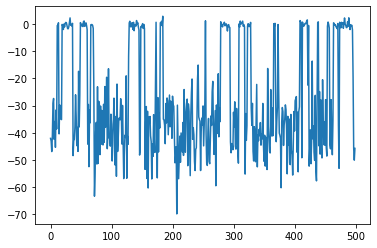

In [147]:
T = 500
x,s = HMM_list[1].rand(T)
plt.plot(x[0])

plt.savefig('classical_h_generate')

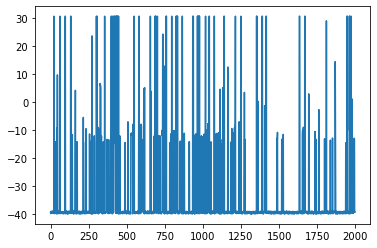

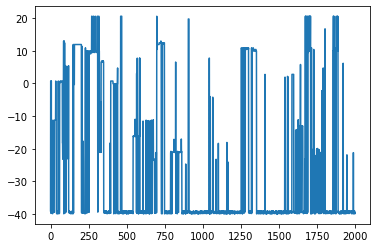

In [148]:
plt.figure()
plt.plot(disco_all_feature_data[2][0])
plt.savefig('disco_feature')
plt.figure()
plt.plot(classical_all_feature_data[3][0])

plt.savefig('classical_feature2')

In [146]:
for i in range(9):
    print(HMM_list[1].outputDistr[i].means)

[-0.07531595]
[-7.23328463]
[-39.50033591]
[-0.07531595]
[-0.07531595]
[-7.23328463]
[-39.50033591]
[-0.07531595]
[0]


In [145]:
print(np.round(HMM_list[1].stateGen.A,2))

[[0.21 0.   0.09 0.21 0.21 0.   0.09 0.21 0.  ]
 [0.   0.   0.5  0.   0.   0.   0.5  0.   0.  ]
 [0.02 0.   0.47 0.02 0.02 0.   0.47 0.02 0.  ]
 [0.21 0.   0.09 0.21 0.21 0.   0.09 0.21 0.  ]
 [0.21 0.   0.09 0.21 0.21 0.   0.09 0.21 0.  ]
 [0.   0.   0.5  0.   0.   0.   0.5  0.   0.  ]
 [0.02 0.   0.47 0.02 0.02 0.   0.47 0.02 0.  ]
 [0.21 0.   0.09 0.21 0.21 0.   0.09 0.21 0.  ]
 [0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.  ]]


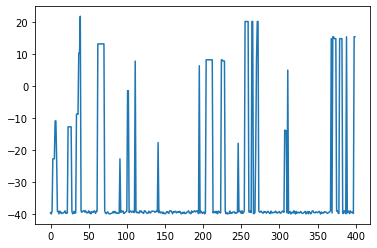

In [124]:
plt.plot(classical_all_feature_data[0][0][200:600])